<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/CarSafetyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [166]:
df = pd.read_csv('/content/sample_data/car.data')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [167]:
df.shape

(1727, 7)

In [168]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [169]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [170]:
set(df.safety.values)

{'high', 'low', 'med'}

In [171]:
set(df['class'].values)

{'acc', 'good', 'unacc', 'vgood'}

In [172]:
set(df.lug_boot.values)

{'big', 'med', 'small'}

In [173]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [174]:
X = df.drop(['class'], axis=1)
y = df['class']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [176]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
342,vhigh,low,2,more,small,med
150,vhigh,high,3,4,big,med
1264,med,low,4,more,med,high
441,high,vhigh,2,4,small,med
1542,low,med,3,2,med,med


In [177]:
y_train.head()

342     unacc
150     unacc
1264    vgood
441     unacc
1542    unacc
Name: class, dtype: object

In [178]:
print(y_train.shape)
print(X_train.shape)

(1157,)
(1157, 6)


In [179]:
X_train = pd.get_dummies(X_train)
X_train.shape

(1157, 21)

In [180]:
y_train = pd.get_dummies(y_train)
y_train.shape

(1157, 4)

In [181]:
X_test = pd.get_dummies(X_test)
y_test = pd.get_dummies(y_test)

In [182]:
print(X_test.shape, y_test.shape)

(570, 21) (570, 4)


In [183]:
print(X_train.shape, y_train.shape)

(1157, 21) (1157, 4)


In [184]:
clf_tree = DecisionTreeClassifier()
params = {'max_depth': range(1, 10 + 1),
          'min_samples_split': range(1, 10 + 1),
          'criterion': ['gini', 'entropy']}

grid = GridSearchCV(clf_tree, params, cv=3)

In [185]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_split': range(1, 11)})

In [186]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 7}

In [187]:
best_clf = grid.best_estimator_

In [188]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=7)

<Axes: >

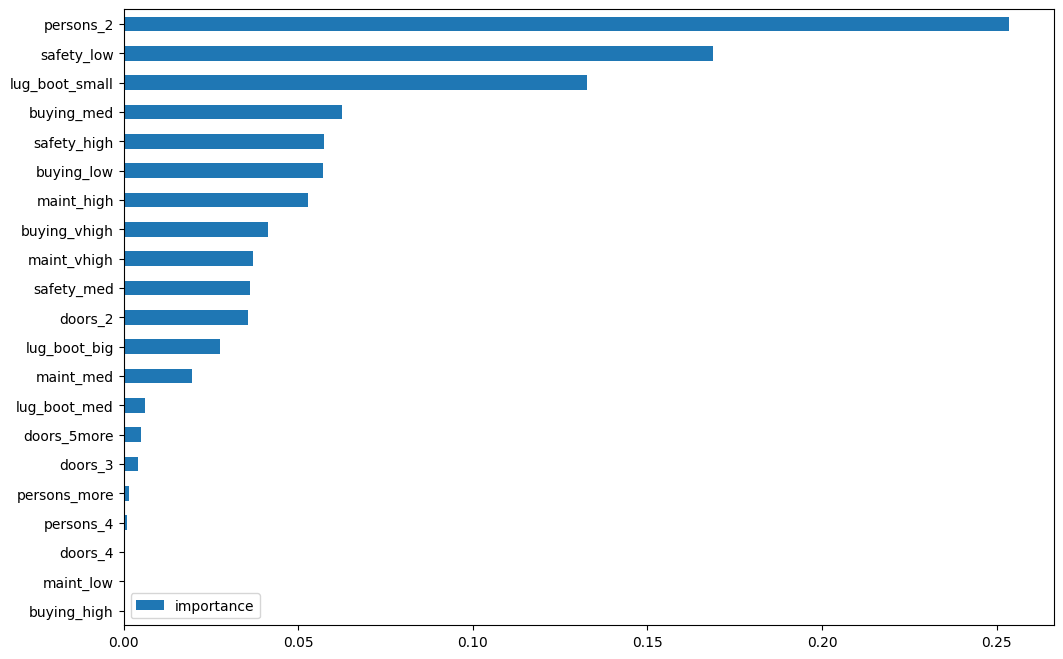

In [189]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [190]:
from sklearn.metrics import precision_score, recall_score

In [191]:
X_test.shape

(570, 21)

In [192]:
y_pred = best_clf.predict(X_test)
print(y_pred.shape, y_test.shape)

(570, 4) (570, 4)


In [193]:
from sklearn.metrics import accuracy_score

In [194]:
accuracy_score(y_test, y_pred)

0.9508771929824561

In [195]:
y_pred = best_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.975799481417459

In [199]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=7, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=7, random_state=0)

In [200]:
y_pred = clf_gini.predict(X_test)

In [201]:
accuracy_score(y_test, y_pred)

0.9508771929824561

[FireShip made a new video about AI:](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# **YOUR CAR IS NOT SAFE.**
# **GIVE IT TO ME FOR FREE**
(like a mister beast)

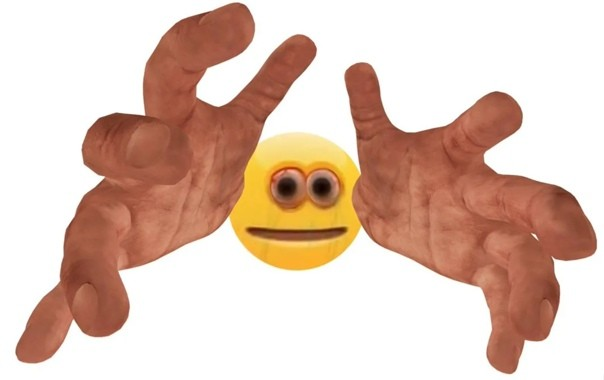